In [514]:
%matplotlib inline
import pandas as pd
import fiona
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [498]:
file_name = "../Data/Measurement-action-freedom_FINAL-dataset-1572699924.xlsx"
xl_file = pd.ExcelFile(file_name)

In [499]:
df_cb = pd.read_excel(file_name, sheet_name='Code Book')
df = pd.read_excel(file_name, sheet_name='RATINGS', header=1)

In [500]:
df.columns

Index(['Region', 'Subregion - broad', 'Subregion - detailed', 'Income group',
       'Number', 'Country', '1.1.1 ', '1.1.2 ', '1.1.3 ', 'ACTIVITY',
       ...
       '2.1.6 .1', 'ACTIVITY.27', 'M5 (/2)', 'M5 %', 'SUM (/28)',
       'NEG M4 1.4.3 + M4 1.8.1', 'TOTAL SUM', 'TOTAL %', 'TOTAL % ROUND',
       'Total negs'],
      dtype='object', length=152)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-4875523.658 444516.987, -4933..."


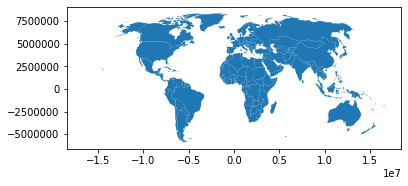

In [501]:
from geonamescache import GeonamesCache
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']
world.plot()
world[world['name'].str.contains("France")]


In [504]:
world[world['iso_a3']=='-99']
world.at[world['name']=='Norway','iso_a3']='NOR'
world.at[world['name']=='France','iso_a3']='FRA'
world.at[world['name']=='Kosovo','iso_a3']='XKX'
world.at[world['name']=='N. Cyprus','iso_a3']='CYP'
world.at[world['name']=='Somaliland','iso_a3']='SOM'

In [508]:
df[df['Country']=='China']

,Region,Subregion - broad,Subregion - detailed,Income group,Number,Country,1.1.1,1.1.2,1.1.3,ACTIVITY,...,2.1.6 .1,ACTIVITY.27,M5 (/2),M5 %,SUM (/28),NEG M4 1.4.3 + M4 1.8.1,TOTAL SUM,TOTAL %,TOTAL % ROUND,Total negs
32,Asia and the Pacific,Eastern Asia,Eastern Asia,Upper-middle income,33,China,1,1,0,0.666667,...,0,0.166667,0.366667,18.333333,11.85,-2,9.85,35.18,35.2,-7


In [510]:
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')

country_index = {}
country_index['Bolivia, Plurinational State of'] = 'BOL'
country_index['Brunei Darussalam'] = 'BRN'
country_index['Cape Verde'] = 'CPV'
country_index['Congo'] = 'COG'
country_index['Congo, Democratic Republic of the'] = 'COG'
country_index['Czech Republic'] = 'CZE'
country_index['Côte d\'Ivoire'] = 'CIV'
country_index['Hong Kong, China'] = 'HKG'
country_index['Iran, Islamic Republic of'] = 'IRN'
country_index['Korea, Democratic People\'s Republic of'] = 'PRK' # a verifier
country_index['Korea, Republic of'] = 'KOR'
country_index['Lao People\'s Democratic Republic'] = 'LAO'
country_index['Macedonia, the former Yugoslav Republic of'] = 'MKD'
country_index['Moldova, Republic of'] = 'MDA'
country_index['Russian Federation'] = 'RUS'
#country_index['Swaziland'] = ''
country_index['Taiwan, China'] = 'TWN'
country_index['Tanzania, United Republic of'] = 'TZA'
#country_index['Timor-Leste'] = ''
country_index['Venezuela, Bolivarian Republic of'] = 'VEN'
country_index['Viet Nam'] = 'VNM'

df['iso3'] = df.Country.apply(lambda x: country_index.get(x, mapper(x)))
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#countries = GeonamesCache().get_countries_by_names()
#countries
df

,region,subregion_-_broad,subregion_-_detailed,income_group,number,country,1.1.1,1.1.2,1.1.3,activity,...,activity.27,m5_/2,m5_%,sum_/28,neg_m4_1.4.3_+_m4_1.8.1,total_sum,total_%,total_%_round,total_negs,iso3
0,Europe and Central Asia,"Northern, Southern and Western Europe",Southern Europe,Upper-middle income,1,Albania,1,0,0,0.333333,...,0.0,0.0,0.0,17.433333,-1,16.433333,58.69,58.7,-6,ALB
1,Africa,Northern Africa,Northern Africa,Upper-middle income,2,Algeria,0,0,0,0.000000,...,0.0,0.0,0.0,10.350000,0,10.350000,36.96,37.0,-3,DZA
2,Africa,Sub-Saharan Africa,Central Africa,Upper-middle income,3,Angola,0,0,0,0.000000,...,0.0,0.0,0.0,9.483333,0,9.483333,33.87,33.9,-3,AGO
3,Americas,Latin America and the Caribbean,Caribbean,High income,4,Antigua and Barbuda,0,0,0,0.000000,...,0.0,0.0,0.0,12.500000,-1,11.500000,41.07,41.1,-2,ATG
4,Americas,Latin America and the Caribbean,South America,High income,5,Argentina,1,1,1,1.000000,...,0.0,0.0,0.0,20.200000,0,20.200000,72.14,72.1,-2,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Asia and the Pacific,South-Eastern Asia and the Pacific,Pacific Islands,Lower-middle income,179,Vanuatu,0,0,0,0.000000,...,0.0,0.0,0.0,2.733333,0,2.733333,9.76,9.8,-1,VUT
179,Americas,Latin America and the Caribbean,South America,High income,180,"Venezuela, Bolivarian Republic of",0,0,0,0.000000,...,0.0,0.0,0.0,7.216667,-1,6.216667,22.20,22.2,-4,VEN
180,Asia and the Pacific,South-Eastern Asia and the Pacific,South-Eastern Asia,Lower-middle income,181,Viet Nam,1,0,0,0.333333,...,0.0,0.0,0.0,14.966667,-2,12.966667,46.31,46.3,-4,VNM
181,Africa,Sub-Saharan Africa,Eastern Africa,Lower-middle income,182,Zambia,0,0,0,0.000000,...,0.0,0.0,0.0,11.733333,0,11.733333,41.90,41.9,-1,ZMB


In [511]:
df[df['country']=='France']

,region,subregion_-_broad,subregion_-_detailed,income_group,number,country,1.1.1,1.1.2,1.1.3,activity,...,activity.27,m5_/2,m5_%,sum_/28,neg_m4_1.4.3_+_m4_1.8.1,total_sum,total_%,total_%_round,total_negs,iso3
55,Europe and Central Asia,"Northern, Southern and Western Europe",Western Europe,High income,56,France,0,0,0,0.0,...,0.166667,0.366667,18.333333,18.566667,0,18.566667,66.31,66.3,-2,FRA


In [512]:
#world.columns
world=world.rename(columns={"iso_a3": "iso3"})
#dfnodup.iso3

world=world.merge(df,on='iso3')
#world.plot()
#world['total_%_round']
world[world['name']=='France']


,pop_est,continent,name,iso3,gdp_md_est,geometry,region,subregion_-_broad,subregion_-_detailed,income_group,...,2.1.6_.1,activity.27,m5_/2,m5_%,sum_/28,neg_m4_1.4.3_+_m4_1.8.1,total_sum,total_%,total_%_round,total_negs
38,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-4875523.658 444516.987, -4933...",Europe and Central Asia,"Northern, Southern and Western Europe",Western Europe,High income,...,0,0.166667,0.366667,18.333333,18.566667,0,18.566667,66.31,66.3,-2


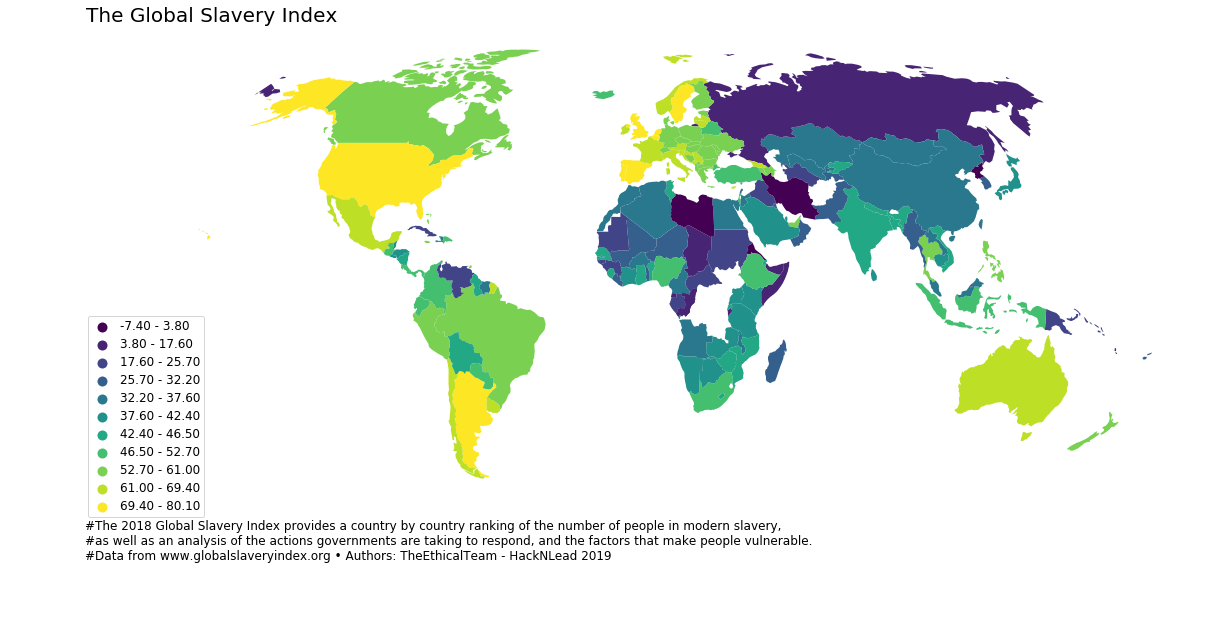

In [515]:
#known = df.dropna(subset=['TOTAL % ROUND'])
#unknown = df[df['TOTAL % ROUND'].isna()]
ax = world.plot(column='total_%_round',figsize=(20,12),scheme='fisher_jenks', k=11,legend=True)

#ax = world.plot(column='total_%_round', cmap='inferno_r', figsize=(20, 12), scheme='fisher_jenks', k=9, legend=True, edgecolor='#aaaaaa')
#unknown.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

ax.set_title('The Global Slavery Index', fontdict={'fontsize': 20}, loc='left')
description = '''
#The 2018 Global Slavery Index provides a country by country ranking of the number of people in modern slavery, 
#as well as an analysis of the actions governments are taking to respond, and the factors that make people vulnerable. 
#Data from www.globalslaveryindex.org • Authors: TheEthicalTeam - HackNLead 2019 '''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
legend.set_bbox_to_anchor((.11, .4))
legend.prop.set_size(12)
plt.savefig('GlobalSlaveryIndex.png')

In [516]:
index=df[df['country']=='China']['total_%']
index
file = open('../rating/rating_globalslaveryindex.txt','w')
file.write(str(index))
file.close()